<a href="https://colab.research.google.com/github/EnzoMoraes-full/Beginner-Python-Challengess/blob/main/PCA_PI_Artigos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Covariância:
[[ 1.74860037e-25 -2.69605700e-26  3.07828436e-14]
 [-2.69605700e-26  3.43985749e-23  6.59413000e-12]
 [ 3.07828436e-14  6.59413000e-12  2.62413518e+00]]

Autovalores:
[2.62413518e+00 1.78269918e-23 1.73895830e-25]

Autovetores:
[[ 1.15991315e-14 -5.86356524e-03  9.99982540e-01]
 [ 2.51296959e-12  9.99982809e-01  5.90922020e-03]
 [ 1.00000000e+00 -2.51285838e-12 -2.64486196e-14]]

Dois maiores autovalores:
(2.6241351762484433, 1.7826991784605652e-23)

Dois maiores autovetores:
(array([1.15991315e-14, 2.51296959e-12, 1.00000000e+00]), array([-5.86356524e-03,  9.99982809e-01, -2.51285838e-12]))


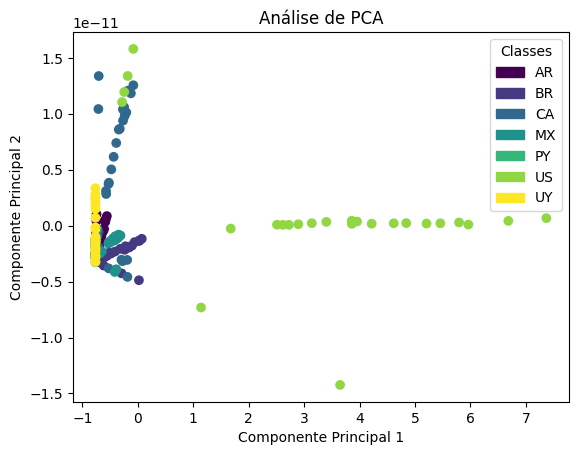

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder

# Carrega o dataset
dataset = pd.read_csv('DatasetPCAartigos/Artigos_PIBs_PCA.csv')

# Muda de string para float
for column in dataset.columns[2:]:
    dataset[column] = dataset[column].str.replace(',', '').astype(float)

# Cria um dataframe
data = pd.DataFrame(data=dataset)
data['target'] = dataset.País[dataset.index]

# Separa os números dos rótulos
y = data['target'].values
X = data.iloc[:, 1:4].values
#print(X)
#print(y)
'''
Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

'''
# Normalizar os dados
X = (X - np.mean(X)) / np.std(X)

# Calcular e imprimir a matriz de covariância
cov_matrix = np.cov(X.T)
print("Matriz de Covariância:")
print(cov_matrix)

# Calcular e imprimir os autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores:")
print(eigenvectors)

# Ordenar os autovalores e autovetores em ordem decrescente
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Selecionar os dois maiores autovalores e autovetores
top_eigenvalues = eigen_pairs[0][0], eigen_pairs[1][0]
top_eigenvectors = eigen_pairs[0][1], eigen_pairs[1][1]

print("\nDois maiores autovalores:")
print(top_eigenvalues)
print("\nDois maiores autovetores:")
print(top_eigenvectors)

# Aplica o PCA com 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Converte os rótulos para valores numéricos
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Obtem cores únicas para cada classe
num_classes = len(np.unique(y))
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

# Cria um mapeamento de classe para cor
class_color_map = {class_label: color for class_label, color in zip(np.unique(y), colors)}

# Visualiza os resultados
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')

# Adiciona legendas para as classes
legend_handles = [Patch(color=class_color_map[label], label=label) for label in np.unique(y)]

plt.legend(handles=legend_handles, title="Classes")

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de PCA')
plt.show()